<a href="https://colab.research.google.com/github/darkzard05/kaggle/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 생성
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from keras.optimizers import RMSprop
print(tf.__version__)

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

2.5.0


In [ ]:
# 데이터 생성
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit_recognizer/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/digit_recognizer/test.csv')

print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train = train['label']
X_train = train.iloc[:, 1:]
X_test = test

In [ ]:
# 데이터를 훈련세트와 검증세트로 나눈다.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=10)

X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.values.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.shape[0], 28, 28, 1)
X_train.shape, X_val.shape, X_test.shape

((28140, 28, 28, 1), (13860, 28, 28, 1), (28000, 28, 28, 1))

In [ ]:
# 데이터를 0과 1 사이의 수로 바꾼다.
X_train = X_train / 255.0
X_val = X_val / 255.0

In [ ]:
# # XGBoost
# xgb = XGBClassifier(random_state=10)
# parameters = {'max_depth': [3, 5, 7, 9]
#              }
# xgb = GridSearchCV(xgb, param_grid=parameters, cv=5, verbose=2, n_jobs=-1, return_train_score=True)
# xgb.fit(X_train, y_train)
# train_score_xgb = round(xgb.score(X_train, y_train) * 100, 3)
# val_score_xgb = round(xgb.score(X_val, y_val) * 100, 3)
# print('XGBoost의 그리드서치 훈련(검증)세트 점수: {}({})'.format(train_score_xgb, val_score_xgb))
# print('XGBoost의 그리드서치 최고 파라미터: {}'.format(xgb.best_params_))
# print('XGBoost의 그리드서치 최고 모델: {}'.format(xgb.best_estimator_))
# result_grid_xgb = pd.DataFrame(xgb.cv_results_)
# result_grid_xgb[['mean_train_score', 'mean_test_score']].plot()
# result_grid_xgb.loc[:, ['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

In [ ]:
# # Multilayer Perceptron
# mlp = MLPClassifier(activation='relu', solver='adam', hidden_layer_sizes=(3000),
#                     alpha=0.001, early_stopping=True, random_state=10)
# parameters = {'hidden_layer_sizes': [(500, 500), (600, 600), (900, 900)]
#               }
# mlp = GridSearchCV(mlp, param_grid=parameters, cv=5, verbose=2, n_jobs=-1, return_train_score=True)
# mlp.fit(X_train, y_train)
# train_score_mlp = round(mlp.score(X_train, y_train) * 100, 3)
# val_score_mlp = round(mlp.score(X_val, y_val) * 100, 3)
# print('MLP의 그리드서치 훈련(검증)세트 점수: {}({})'.format(train_score_mlp, val_score_mlp))
# print('MLP의 그리드서치 최고 파라미터: {}'.format(mlp.best_params_))
# print('MLP의 그리드서치 최고 모델:{}'.format(mlp.best_estimator_))
# result_grid_mlp = pd.DataFrame(mlp.cv_results_)
# result_grid_mlp[['mean_train_score', 'mean_test_score']].plot()
# result_grid_mlp.loc[:, ['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

In [ ]:
# CNN
model = models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
Total params: 37,568
Trainable params: 37,568
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
fit_model = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
880/880 [==============================] - 47s 52ms/step - loss: 0.2012 - accuracy: 0.9395 - val_loss: 0.0726 - val_accuracy: 0.9790
Epoch 2/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0605 - accuracy: 0.9815 - val_loss: 0.0662 - val_accuracy: 0.9785
Epoch 3/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0448 - val_accuracy: 0.9864
Epoch 4/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0317 - accuracy: 0.9905 - val_loss: 0.0538 - val_accuracy: 0.9828
Epoch 5/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0487 - val_accuracy: 0.9862
Epoch 6/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 7/50
880/880 [==============================] - 45s 51ms/step - loss: 0.0140 - accuracy: 0.9956 - val_loss: 0.0462 - val_accuracy:

In [ ]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=2)

434/434 - 5s - loss: 0.0731 - accuracy: 0.9907


In [ ]:
round(val_loss, 4), round(val_acc, 4)

(0.0731, 0.9907)

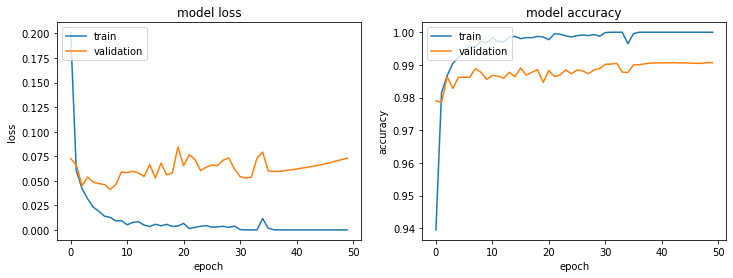

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].plot(fit_model.history['loss'])
axs[0].plot(fit_model.history['val_loss'])
axs[0].set_title('model loss')
axs[0].set_ylabel('loss')
axs[0].set_xlabel('epoch')
axs[0].legend(['train', 'validation'], loc='upper left')
axs[1].plot(fit_model.history['accuracy'])
axs[1].plot(fit_model.history['val_accuracy'])
axs[1].set_title('model accuracy')
axs[1].set_ylabel('accuracy')
axs[1].set_xlabel('epoch')
axs[1].legend(['train', 'validation'], loc='upper left')

In [ ]:
y_test = model.predict(X_test)
submission = pd.DataFrame({'ImageId': range(1, y_test.shape[0]+1) ,'Label': np.argmax(y_test, axis=1)})
submission.to_csv('/content/drive/MyDrive/Colab Notebooks/digit_recognizer/submission.csv', index=False)